In [43]:
import tweepy
import time

consumer_key = 'LkBNX30N42A6FZghHrGufJ9IQ'
consumer_secret = 'sGNmOjfKAQwuGErjrkd0xQbyTTarste5qBmKJUZ9V5A8m5bZ2G'
access_token = '69864697-60XZYloRkRtANVbfAyzeJi70XyKic1PMY7TfG1YIC'
access_token_secret = 'p9GS2paH6rQC7eHTms4K4s15qtnGldQyiIGOUkJdVKKVT'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

user = api.me()
 
print('Name: ' + user.name)
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: Aditya Gaurav
Location: 
Friends: 354


In [44]:
ids = []
for page in tweepy.Cursor(api.followers_ids, screen_name="adgpi").pages():
    ids.extend(page)
    time.sleep(60)
screen_names = [user.screen_name for user in api.lookup_users(user_ids=ids)]

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)

In [ ]:
screen_names

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
N=1000
data = np.random.randn(N)

In [23]:
avg = np.mean(data)
var = np.var(data)

In [24]:
var

1.0391471280201436

In [25]:
pdf_x = np.linspace(np.min(data),np.max(data),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'Fit' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'Data' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


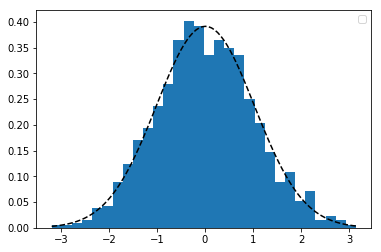

In [26]:
plt.figure()
plt.hist(data,30,normed=True)
plt.plot(pdf_x,pdf_y,'k--')
plt.legend(("Fit","Data"),"best")
plt.show()

In [27]:
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import numpy as np
import pandas as pd

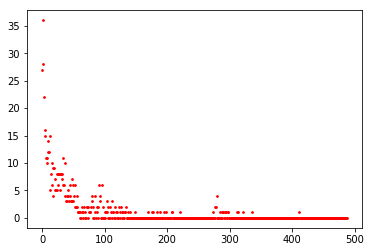

In [49]:
df = pd.read_csv('Dataset/russia.csv',names=['creation_date','tweet_id','retweet_count','like_count'])
var = list(df['retweet_count'][df['tweet_id'] == 892661702059331584])
val = [var[0]]
for i in range(0,len(var)-1):
    res = abs(var[i+1]-var[i])
    val.append(res)
F1 = np.array(val)
t1 = np.array(range(0,len(val)))
plt.plot(t1, F1, 'ro',markersize=np.sqrt(3.), label="original data")
plt.show()

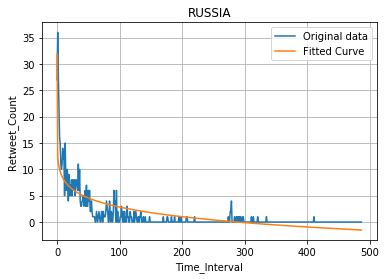

In [50]:
plt.plot(t1, F1, label="Original data")

# curvefit

def func(x, m, c, c0):
    return c0 + x**m * c

popt, pcov = optimize.curve_fit(func, t1, F1, maxfev=1000)
plt.plot(t1, func(t1, *popt), label="Fitted Curve")
plt.legend(loc='upper right')
plt.xlabel('Time_Interval')
plt.ylabel('Retweet_Count')
plt.title('RUSSIA')
plt.grid()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('russia.png', dpi=100)

In [51]:
popt

array([  0.08835703, -19.32252103,  31.87121084])

In [52]:
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('russia.png', dpi=100)